# 2019 Fordgobike Dataset Exploration and Visualization
## by Mahmoud Osama

## Preliminary Wrangling

> We will investigate **Ford GoBike System Dataset**, assess its quality and tidiness, then clean it that ’s which called data wrangling. We will document our wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries).


>**Ford GoBike System Dataset**  includes information about individual rides made
in a bike-sharing system covering the greater San Francisco Bay area.

In [524]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## Data Gathering

> We will load our dataset and describe its properties.

In [525]:
# Load my data and print out a few lines. 
df = pd.read_csv('201902-fordgobike-tripdata.csv')
fordgobike_df = df.copy() # Taking a copy of the dataframe
fordgobike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [526]:
fordgobike_df.shape

(183412, 16)

#### So, our data consists of 183,412 row (records) and 16 columns

## Assessing The Data

**We are looking for Two main things:**
 - Data’s Quality (There are no missing data, invalid data, inaccurate data, inconsistent data,...etc)
 - Data’s Tidiness 
 
**We have two Types of Assessment:**
 - Visual Assessment
 - Programmatic Assessment

In [527]:
#showing the data in our dataframe
fordgobike_df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


**Data Quality issues** "Data has issues with content such as missing , duplicate or incorrect data"


We notice that some columns have a lot of missing values (NaN) as follow:
- member_birth_year,	member_gender


**Tidiness** "Data has stuctural issues"
- We notice that there is no column contains Trip duration in mins , user age. 



### Programmatic Assessment

In [528]:
#showing a summary of contents of each column and number of null values in each column in our dataframe
fordgobike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [529]:
fordgobike_df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

We notice that there are missing values in the following columns:<font color='red'>
   - member_birth_year, member_gender.
   - start_station_id , start_station_name , end_station_id, end_station_name.</font>

In [530]:
fordgobike_df.duplicated().sum()

0

We notice that <font color='Green'>there is no dublicate records. </font>

In [531]:
fordgobike_df.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [532]:
fordgobike_df.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [533]:
fordgobike_df.bike_share_for_all_trip.value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

### Assesing Data Summary

### Total Quality Issues:

- start_time, end_time shoud be in datetime not object.
- start_station_name, end_station_name shoud be in string not object.
- member_gender, user_type into Category not Object.

- our claim through visual assesment of missing values is confirmed as:
 - We found about 8000+ missing value in the following columns: 
   - member_birth_year, member_gender.
- We found about 197 missing value in the following columns: 
   - start_station_id , start_station_name , end_station_id, end_station_name.
   

### Total Tidiness issues:
 - There is no column which contains the trip duration in mins and user age.
 - the Trip start time should be separated into two columns as follow: 
   - Trip start hour of the day , Trip start day of the week.

### Data Cleaning:
We will trim and clean our dataset for analysis
Depending on our Analysis we will need to do the following:

- convert the null values in following columns to 'No data provided':
  - start_station_id , start_station_name , end_station_id, end_station_name, member_gender
- convert the null values in following columns to zero:
  - member_birth_year
- Adjust the Data types for the following columns: 
   - start_time, end_time, start_station_name, end_station_name, member_gender, user_type.
- Create a new column contains the trip duration in mins and user age.
- the Trip start time should be separated into two columns as follow: 
   - Trip start hour of the day , Trip start day of the week.

**We will replace Null values in the following columns with 'No data provided'** : start_station_id , start_station_name , end_station_id, end_station_name, member_gender.

In [534]:
fordgobike_df['start_station_id'].fillna('No data provided', inplace = True)
fordgobike_df['start_station_name'].fillna('No data provided', inplace = True)
fordgobike_df['end_station_id'].fillna('No data provided', inplace = True)
fordgobike_df['end_station_name'].fillna('No data provided', inplace = True)
fordgobike_df['member_gender'].fillna('No data provided', inplace = True)

**We will replace Null values in the following columns with '0'** : member_birth_year.

In [535]:
fordgobike_df['member_birth_year'].fillna('0', inplace = True)

In [536]:
print(fordgobike_df[['start_station_id','end_station_id','end_station_name','start_station_name','member_birth_year','member_gender']].isnull().sum())

start_station_id      0
end_station_id        0
end_station_name      0
start_station_name    0
member_birth_year     0
member_gender         0
dtype: int64


We will notice that: **<font color='green'>these columns do not have any missing values anymore </font>**

In [537]:
fordgobike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183412 non-null object
start_station_name         183412 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183412 non-null object
end_station_name           183412 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          183412 non-null object
member_gender              183412 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(4), int64(2), object(10)
memory usage: 22.4+ MB


So, we notice that: **<font color='green'>There is not any missing value anymore throughout the whole dataframe.**

### Adjusting the datatypes for some variables 

In [538]:
fordgobike_df['start_time'].head(10)

0    2019-02-28 17:32:10.1450
1    2019-02-28 18:53:21.7890
2    2019-02-28 12:13:13.2180
3    2019-02-28 17:54:26.0100
4    2019-02-28 23:54:18.5490
5    2019-02-28 23:49:58.6320
6    2019-02-28 23:55:35.1040
7    2019-02-28 23:41:06.7660
8    2019-02-28 23:41:48.7900
9    2019-02-28 23:49:47.6990
Name: start_time, dtype: object

In [539]:
# adjusting start_time data type to date
fordgobike_df['start_time'] =pd.to_datetime(fordgobike_df['start_time'])
fordgobike_df['start_time'][0]

Timestamp('2019-02-28 17:32:10.145000')

In [540]:
fordgobike_df['end_time'].head(10)

0    2019-03-01 08:01:55.9750
1    2019-03-01 06:42:03.0560
2    2019-03-01 05:24:08.1460
3    2019-03-01 04:02:36.8420
4    2019-03-01 00:20:44.0740
5    2019-03-01 00:19:51.7600
6    2019-03-01 00:14:42.5880
7    2019-03-01 00:08:02.7560
8    2019-03-01 00:07:59.7150
9    2019-03-01 00:07:17.0250
Name: end_time, dtype: object

In [541]:
# adjusting end_time data type to date
fordgobike_df['end_time'] =pd.to_datetime(fordgobike_df['end_time'])
fordgobike_df['end_time'][0]

Timestamp('2019-03-01 08:01:55.975000')

In [542]:
# adjusting some columns data type to string
fordgobike_df['start_station_id'] = fordgobike_df['start_station_id'].astype('str')
fordgobike_df['end_station_id'] = fordgobike_df['end_station_id'].astype('str')
fordgobike_df['start_station_name'] = fordgobike_df['start_station_name'].astype('str')
fordgobike_df['end_station_name'] = fordgobike_df['end_station_name'].astype('str')

In [543]:
fordgobike_df['member_birth_year'] = fordgobike_df['member_birth_year'].astype('int')        

In [544]:
# adjusting user_type, member_gender data type to Category
fordgobike_df['user_type'] = fordgobike_df['user_type'].astype('category')
fordgobike_df['member_gender'] = fordgobike_df['member_gender'].astype('category')

### Create a new column contains the trip duration in mins

In [545]:
fordgobike_df['duration_min']= fordgobike_df['duration_sec']/60
fordgobike_df['duration_min'].tail(10)

183402     2.033333
183403     4.150000
183404     4.266667
183405     1.850000
183406    11.766667
183407     8.000000
183408     5.216667
183409     2.350000
183410     2.316667
183411     4.516667
Name: duration_min, dtype: float64

### Create a new column contains User age

In [546]:
fordgobike_df['user_age']= 2019- fordgobike_df['member_birth_year'] 
fordgobike_df['user_age'].tail(10)

183402    2019
183403      19
183404      39
183405      35
183406      31
183407      23
183408      35
183409      29
183410      31
183411      30
Name: user_age, dtype: int32

### Making separate columns for Hour and Day

In [547]:
fordgobike_df['start_date']= fordgobike_df.start_time.dt.strftime("%m/%d/%y")
fordgobike_df['Trip_day of the week'] = fordgobike_df.start_time.dt.strftime('%A')
fordgobike_df['Trip_hour of the day'] = fordgobike_df.start_time.dt.strftime('%H')

In [548]:
fordgobike_df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,user_age,start_date,Trip_day of the week,Trip_hour of the day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984,Male,No,869.750000,35,02/28/19,Thursday,17
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,2535,Customer,0,No data provided,No,708.683333,2019,02/28/19,Thursday,18
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972,Male,No,1030.900000,47,02/28/19,Thursday,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989,Other,No,608.166667,30,02/28/19,Thursday,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974,Male,Yes,26.416667,45,02/28/19,Thursday,23
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,5200,Subscriber,1959,Male,No,29.883333,60,02/28/19,Thursday,23
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,...,3803,Subscriber,1983,Female,No,19.116667,36,02/28/19,Thursday,23
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,6329,Subscriber,1989,Male,No,26.916667,30,02/28/19,Thursday,23
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,6548,Subscriber,1988,Other,No,26.166667,31,02/28/19,Thursday,23
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,...,6488,Subscriber,1992,Male,No,17.483333,27,02/28/19,Thursday,23


### Summary Statistics of our dataset as follow:

### What is the structure of your dataset?

> our dataset orginally consists of 183,412 row (records) and 16 columns and Most variables are numeric and concerns three major things as follow: 
  - Trip (duration_sec, start_time, end_time)
  - station (start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude)
  - User (bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip)
 
> After adjustment and cleaning process new columns were created to help in analyzing and expolring the data so, our dataset consists of 21 columns now and the new columns as follow:
 - Trip (duration_min, start_date, Trip_day of the week, Trip_hour of the day)
 - User (member_age)


### What is/are the main feature(s) of interest in your dataset?

> I am intersted in exploring 
 - the relation between the time of the trip (Trip_day of the week, Trip_hour of the day) and the number of trips
 - the relation between the user_type and the number of trips 
 - the relation between the user_type and the the trip duration
 - the relation between the user_age and the number of trips 
 - the relation between the member_gender and the number of trips.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> the trip duration and start time along with user info such as user type and member gender will show us through analysis if there is a direct relation between them that will give us insights to improve the business.

## Univariate Exploration

> In this section, we will investigate distributions of individual variables.

In [549]:
#setting up base color
base_color = sb.color_palette('colorblind')[0]

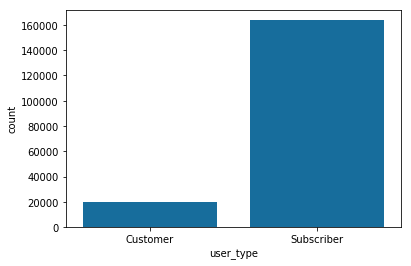

In [550]:
#Exploring user_type variable in terms of number of trips
sb.countplot(data= fordgobike_df,x='user_type', color= base_color)

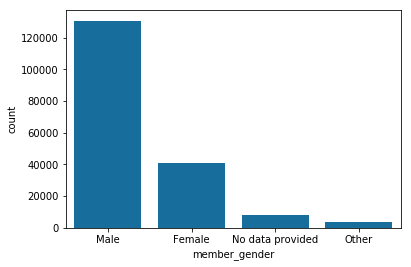

In [551]:
#Exploring member_gender variable in terms of number of trips
sb.countplot(data= fordgobike_df,x='member_gender', color= base_color,order= fordgobike_df['member_gender'].value_counts().index)

We notice that **Most users are Subscribers and Dominant gender is Male**

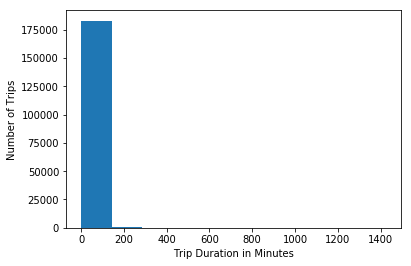

In [552]:
#Exploring trip duration variable in terms of number of trips
plt.hist(data = fordgobike_df, x = 'duration_min')
plt.xlabel('Trip Duration in Minutes')
plt.ylabel('Number of Trips')
plt.show()

We will need to make a further zome in to get useful insights so, we will limit our graph to 60 mins

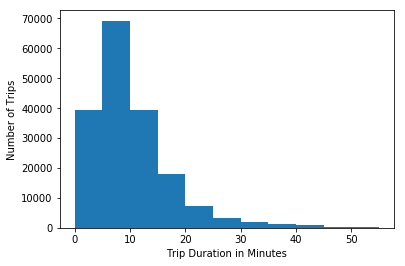

In [553]:
#Exploring trip duration variable in terms of number of trips
bins = np.arange(0, 60, 5)
plt.hist(data = fordgobike_df, x = 'duration_min', bins = bins)
plt.xlabel('Trip Duration in Minutes')
plt.ylabel('Number of Trips')
plt.show()

We will notice that **most of trips are taking less than 15 mins** and **the top number of the trips takes about 10 mins.**

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.,
        40000.]), <a list of 9 Text xticklabel objects>)

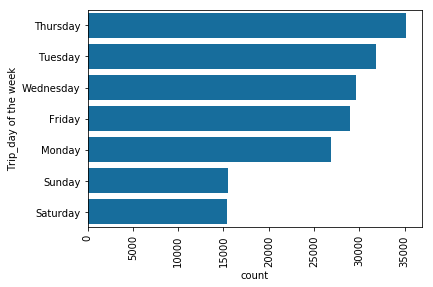

In [554]:
sb.countplot(data= fordgobike_df,y='Trip_day of the week',color= base_color,order= fordgobike_df['Trip_day of the week'].value_counts().index)
plt.xticks(rotation=90)

We notice surprisingly that **<font color='red'> the lowest number of trips are in the weekend holiday (Saturday and Sunday)</font>**  while **<font color='green'>the top number of the trips is on Thursday the last working day of the week.</font>**

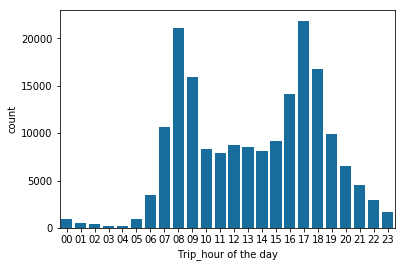

In [555]:
sb.countplot(data= fordgobike_df,x='Trip_hour of the day', color= base_color)

We notice that **<font color='green'>the rush hours of number of trips are 8 (8 am)and 17 (5 pm) </font>**  which is expected as it is the start and end working hour of most jobs while **<font color='red'> the number of the trips is the least and decreasing rapidly after midnight until dawn</font>**

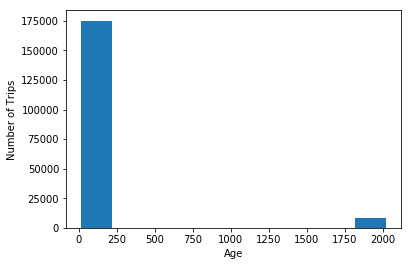

In [556]:
plt.hist(data = fordgobike_df, x = 'user_age'); 
plt.xlabel('Age')
plt.ylabel('Number of Trips')
plt.show()

We notice that **<font color='red'>there is a huge outlier due to the birth year missing data which was filled with zero that made the user age 2019 year</font>** so, we will need to exclude that outlier from the graph to get insights.

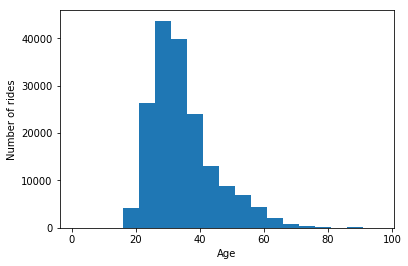

In [557]:
bins = np.arange(1, 100, 5)
plt.hist(data = fordgobike_df, x = 'user_age', bins = bins); 
plt.xlabel('Age')
plt.ylabel('Number of rides')
plt.show()

<font color='red'>We notice another but small outlier after 80 </font> so, will concentrate on the age from 15 to 80

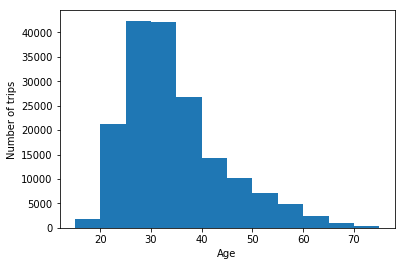

In [558]:
bins = np.arange(15, 80, 5)
plt.hist(data = fordgobike_df, x = 'user_age', bins = bins); 
plt.xlabel('Age')
plt.ylabel('Number of trips')
plt.show()

We notice that **<font color='green'>User with Age between 25 and 35 are making top of number of trips</font>**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Regarding users :
 - Most users are Subscribers and Dominant gender is Male 
 - User with Age between 25 and 35 are making top of number of trips 
 
> Regarding trips :
  - **most of trips are taking less than 15 mins** and **the top number of the trips takes about 10 mins.**
  - surprisingly, **<font color='red'>the lowest number of trips are in the weekend holiday (Saturday and Sunday) </font>** while **<font color='green'>the top number of the trips is on Thursday the last working day of the week.</font>**
  - **<font color='green'>the rush hours of number of trips are 8 (8 am)and 17 (5 pm) </font>**  which is expected as it is the start and end working hour of most jobs while **<font color='red'> the number of the trips is the least and decreasing rapidly after midnight until dawn</font>**
  
> Fortunately no further transformation was required after the cleaning process

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
> Trip Duration: 
 - there was an outlier so, we needed to make a zoomin and limit the number of minutes to 60 to get better insights  
 
> User age: 
 - there was a huge outlier due to **the birth year missing data which was filled with zero within the cleaning process that made the user age 2019 years** so, we needed to exclude that outlier from the graph to get insights 
 - made a further cleaning with **the limiting the age to be from 15 to 80** to exclude another minor outlier to get better insights.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

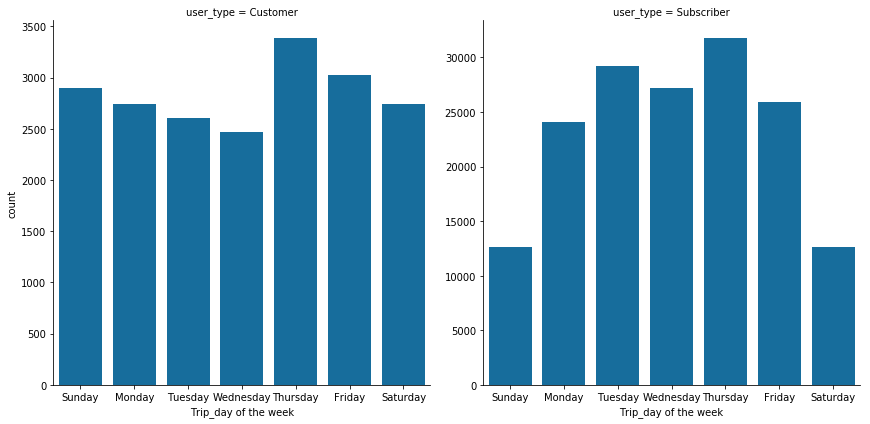

In [559]:
weekday_order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
sb.catplot(data=fordgobike_df, x='Trip_day of the week', col="user_type", order = weekday_order, kind='count', 
           sharey = False, color = base_color, height = 6);

We notice that **Subscribers have the lowest number of trips in the weekend holiday (Saturday and Sunday)** while **Customers have the lowest number of trips on Wednesday and have realtively better numbers of trips in the weekend holiday (Saturday and Sunday).**

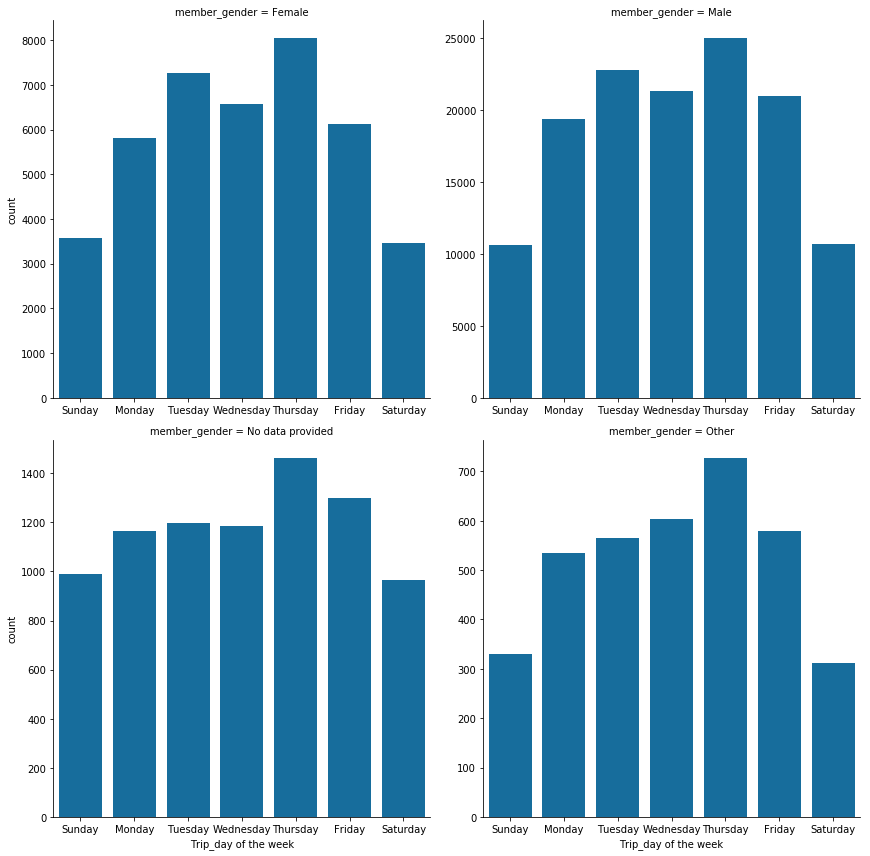

In [560]:
weekday_order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
sb.catplot(data=fordgobike_df, x='Trip_day of the week', col="member_gender", order = weekday_order, col_wrap=2, kind='count', 
           sharey = False,sharex = False, color = base_color, height = 6);

We notice that **Gender Differnce does not have any effect on number of trips through the days of week.**</font>

In [561]:
# we will filter out the outliers in duration_min so, we can make our Bivariate plots easily
fordgobike_df = fordgobike_df.query('duration_min <= 60')
fordgobike_df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181702 entries, 4 to 183411
Data columns (total 21 columns):
duration_sec               181702 non-null int64
start_time                 181702 non-null datetime64[ns]
end_time                   181702 non-null datetime64[ns]
start_station_id           181702 non-null object
start_station_name         181702 non-null object
start_station_latitude     181702 non-null float64
start_station_longitude    181702 non-null float64
end_station_id             181702 non-null object
end_station_name           181702 non-null object
end_station_latitude       181702 non-null float64
end_station_longitude      181702 non-null float64
bike_id                    181702 non-null int64
user_type                  181702 non-null category
member_birth_year          181702 non-null int32
member_gender              181702 non-null category
bike_share_for_all_trip    181702 non-null object
duration_min               181702 non-null float64
user_age         

Text(0, 0.5, 'Trip Duration in Mins')

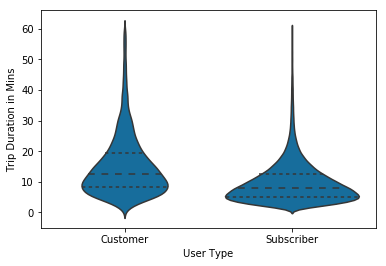

In [562]:
sb.violinplot(data=fordgobike_df, x='user_type', y='duration_min', color=base_color, inner='quartile',scale="area")
plt.xlabel('User Type')
plt.ylabel('Trip Duration in Mins')

We notice that
- **Subscribers have narrower trip duration than Customers**
- **Subscibers have more specific Trips than casual Customers**

Text(0, 0.5, 'Trip Duration in Mins')

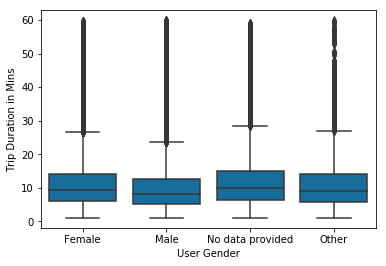

In [563]:
sb.boxplot(data=fordgobike_df, x='member_gender', y="duration_min", color = base_color)
plt.xlabel('User Gender')
plt.ylabel('Trip Duration in Mins')

We notice that **Males tends to have a slightly shorter trips’ duration than females.**

Text(0, 0.5, 'Duration or Trips in Mins')

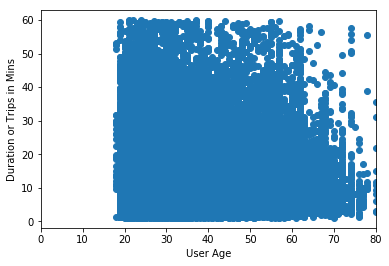

In [564]:
plt.scatter(data = fordgobike_df, x = 'user_age', y = 'duration_min');
plt.xlim(0, 80); # to limit user age to 80 years and we have already filtered duration in mins to 60 min
plt.xlabel('User Age')
plt.ylabel('Duration or Trips in Mins')


We notice that **trip duration decreases as age increases.**

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>  
   - **Subscribers tends to rent bikes on working days**  while  **Customers tends to rent more in the weekend holiday (Saturday and Sunday) for longer duration.**
   - **Subscribers tends to rent bikes for shorter duration** while **Customers tends to rent bikes for longer duration**
   - Gender Differnce does not have any effect on number of trips through the days of week.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>  
  - **Trip duration decreases as age increases.**
  - **Males tends to have a slightly shorter trips’ duration than females.**

## Multivariate Exploration

> Create plots of three or more variables to investigate our data even
further.

Text(0, 0.5, 'Trip Duration in Mins')

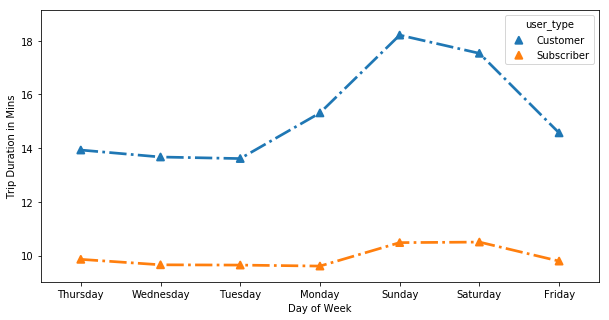

In [565]:
plt.figure(figsize=[10, 5])
sb.pointplot(data=fordgobike_df, x='Trip_day of the week', y='duration_min', hue='user_type', errwidth=0, linestyles='-.'
             ,markers = '^')
plt.xlabel('Day of Week')
plt.ylabel('Trip Duration in Mins')

We notice that: 
- **Both of Users type have a longer trip duration on weekend in relative to their trips during other week days.**
- **Subscribers rent bikes more efficiently as they have a shorter trip duration overall than customers.**
- **It looks like that customers rent bikes for entertainment and fun as they rent it for quite longer duration than subscribers specially on weekend days (Saturday and Sunday)**.

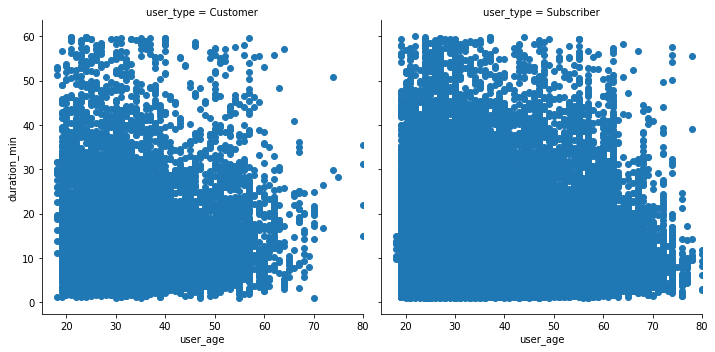

In [566]:
m_var = sb.FacetGrid(data = fordgobike_df, col = 'user_type', height = 5, margin_titles = True)
m_var.map(plt.scatter, 'user_age', 'duration_min')
plt.xlim(15, 80);

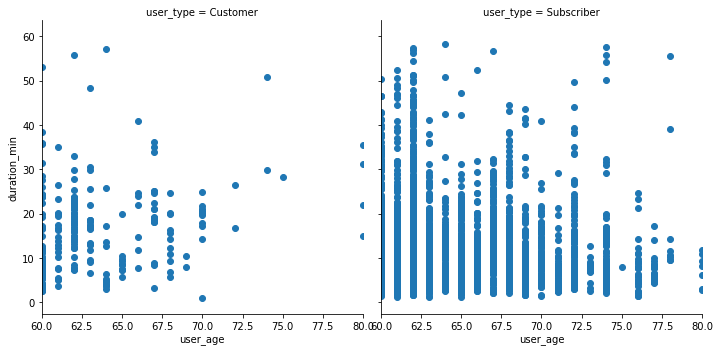

In [567]:
m_var = sb.FacetGrid(data = fordgobike_df, col = 'user_type', height = 5, margin_titles = True)
m_var.map(plt.scatter, 'user_age', 'duration_min')
plt.xlim(60, 80);

We notice that: 
- **Both of Users type have their trips duration decreases as age increases**
- **Subscribers of old age (60-80) have a longer trip duration and larger no of trips from customers.**

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> after the investigation of the three variables ('Trip_day of the week','duration_min','user_type')
We found that **Both of Users type have a longer trip duration on weekend in relative to their trips during other week days and Subscribers rent bikes more efficiently as they have a shorter trip duration overall than customers.**

### Were there any interesting or surprising interactions between features?

> after the investigation of the three variables ( 'user_type', 'user_age', 'duration_min')
We found that **Both of Users type have their trips duration decreases as age increases and Subscribers of old age (60-80) have a longer trip duration and larger no of trips from customers.**